## Scott Breitbach
### DSC530: Final Project
### 14-November-2020

In [25]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import matplotlib
import thinkplot

In [2]:
# Read data file to dataframe
gss = r'GSS.xlsx'
df = pd.read_excel(gss)

# Fix weird spacing of year column
df = df.rename(columns={'Gss year for this respondent                       ':'Gss year for this respondent'})

In [3]:
origColumns = df.columns.tolist()
origColumns

['Gss year for this respondent',
 'Respondents income',
 'Total family income',
 'Number of persons in household',
 'How many grandparents born outside u.s.',
 'Age of respondent',
 'Travel time to work',
 'Number of hours worked last week',
 'Respondent id number',
 'Rs occupational prestige score (2010)']

In [4]:
# Rename column headers
# df.rename(columns={'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'})
df = df.rename(columns={'Gss year for this respondent':'year',
 'Respondents income':'rincome',
 'Total family income':'income',
 'Number of persons in household':'hompop',
 'How many grandparents born outside u.s.':'granborn',
 'Age of respondent':'age',
 'Travel time to work':'commute',
 'Number of hours worked last week':'hrs1',
 'Respondent id number':'id',
 'Rs occupational prestige score (2010)':'prestg10'})

In [5]:
newColumns = df.columns.tolist()
newColumns

['year',
 'rincome',
 'income',
 'hompop',
 'granborn',
 'age',
 'commute',
 'hrs1',
 'id',
 'prestg10']

In [6]:
def CleanColumn(df, columnName):
    na_vals = ["Don't know", "No answer", "Not applicable", "Refused"]
    df[columnName].replace(na_vals, np.nan, inplace = True)
    return df

def CleanData(df):
    for item in newColumns:
        df = CleanColumn(df, item)
    
    # Create unique user IDs for each row:
    df['uniqueID'] = df['year'].map(str) + '-' + df['id'].map(str)
    
    # Replace age of '89 or older' with 89
    df['age'] = df['age'].replace(['89 or older'], 89)

    # Replace grandparents born 'All in u.s' with 0 (born outside U.S.)
    df['granborn'] = df['granborn'].replace(['All in u.s'], 0)

    # Replace travel time of '97+ minutes' with 97
    df['commute'] = df['commute'].replace(['97+ minutes'], 97)
    
    return df

In [7]:
df = CleanData(df)

In [8]:
display(df.dtypes)

year          int64
rincome      object
income       object
hompop      float64
granborn    float64
age         float64
commute     float64
hrs1        float64
id            int64
prestg10      int64
uniqueID     object
dtype: object

In [9]:
df.head()

,year,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID
0,1977,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1
1,1977,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2
2,1977,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3
3,1977,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4
4,1977,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5


In [10]:
def FixIncVals(column):
    # Replace income ranges with average values in new column
    column = column.replace(['Lt $1000'], 500)
    column = column.replace(['$1000 to 2999'], 2000)
    column = column.replace(['$3000 to 3999'], 3500)
    column = column.replace(['$4000 to 4999'], 4500)
    column = column.replace(['$5000 to 5999'], 5500)
    column = column.replace(['$6000 to 6999'], 6500)
    column = column.replace(['$7000 to 7999'], 7500)
    column = column.replace(['$8000 to 9999'], 9000)
    column = column.replace(['$10000 - 14999'], 12500)
    column = column.replace(['$15000 - 19999'], 17500)
    column = column.replace(['$20000 - 24999'], 22500)
    column = column.replace(['$25000 or more'], 25000)
    return column

In [11]:
# Create new columns with usabale values:
df['rincome2'] = FixIncVals(df['rincome'])
df['income2'] = FixIncVals(df['income'])

In [12]:
df.head()

,year,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2
0,1977,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0
1,1977,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0
2,1977,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN
3,1977,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0
4,1977,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN


In [13]:
# df['rincome2'].astype(float)

## Display unique values in column
df.rincome2.unique()
# df.income2.unique()


array([ 7500.,  9000.,    nan, 22500., 12500., 17500.,  4500.,   500.,
        5500., 25000.,  2000.,  3500.,  6500.])

In [14]:
# # Clean rows with non-useful strings, like 'Not applicable':
# def CleanColumn(df, columnName):
#     na_vals = ["Don't know", "No answer", "Not applicable", "Refused"]
#     df[columnName].replace(na_vals, np.nan, inplace = True)
#     return df

# ## REMOVE THIS
# # columnList = ['Age of respondent', 'Respondents income', 'Total family income', 'Number of persons in household', 
# #              'How many grandparents born outside u.s.', 'Number of hours worked last week']

# for item in newColumns:
#     df = CleanColumn(df, item)
    
# # df = CleanData(df, columnList)

In [15]:
# # Convert floats to integers
# floatToInt = ['How many grandparents born outside u.s.', 'Age of respondent', 'Rs occupational prestige score (2010)']

# def MakeIntegers(df, columnName):
# #     df[columnName] = df[columnName].astype(int)
#     df[columnName] = df[columnName].apply(np.int64)  # Need to remove NaNs
    
# for item in floatToInt:
#     MakeIntegers(df, item)

# df['How many grandparents born outside u.s.'].astype(int)

### Columns with NaN cannot be integers ###

In [16]:
# # Clean rows with non-useful strings, like 'Not applicable':
# def CleanColumn(df, columnName):
#     df = df[df[columnName] != "Don't know"]
#     df = df[df[columnName] != "No answer"]
#     df = df[df[columnName] != "Not applicable"]
#     df = df[df[columnName] != "Refused"]
#     return df

# columnList = ['Age of respondent', 'Respondents income', 'Total family income', 'Number of persons in household', 
#              'How many grandparents born outside u.s.', 'Number of hours worked last week']

# for item in columnList:
#     df = CleanColumn(df, item)

In [17]:
# ## Miscellaneous fixes to make data useable:

# # Create unique user IDs for each row:
# df['uniqueID'] = df['year'].map(str) + '-' + df['id'].map(str)

# # Replace age of '89 or older' with 89
# df['age'] = df['age'].replace(['89 or older'], 89)

# # Replace grandparents born 'All in u.s' with 0 (born outside U.S.)
# df['granborn'] = df['granborn'].replace(['All in u.s'], 0)

# # Replace travel time of '97+ minutes' with 97
# df['commute'] = df['commute'].replace(['97+ minutes'], 97)

##### Need to remove NaNs? :(
Apparently you have to use floats if the column contains NaNs, because Pandas

In [18]:
# # Convert floats to integers
# floatToInt = ['How many grandparents born outside u.s.', 'Age of respondent', 'Rs occupational prestige score (2010)']

# def MakeIntegers(df, columnName):
# #     df[columnName] = df[columnName].astype(int)
#     df[columnName] = df[columnName].apply(np.int64)  # Need to remove NaNs
    
# for item in floatToInt:
#     MakeIntegers(df, item)

##### DONE! 
NOTE: Need to replace income ranges with values; new variable / column?

In [19]:
df.head()

,year,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2
0,1977,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0
1,1977,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0
2,1977,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN
3,1977,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0
4,1977,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN


A minimum of 5 variables in your dataset used during your analysis (for help with  selecting, the author made his selection on page 6 of your book). Consider what you  think could have an impact on your question – remember this is never perfect, so don’t  be worried if you miss one (Chapter 1). 
#### Describe what the 5 variables mean in the dataset (Chapter 1). 
#### Histograms of each of 5 variables
Include a histogram of each of the 5 variables – in your summary and analysis, identify  any outliers and explain the reasoning for them being outliers and how you believe they  should be handled (Chapter 2).  

In [ ]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

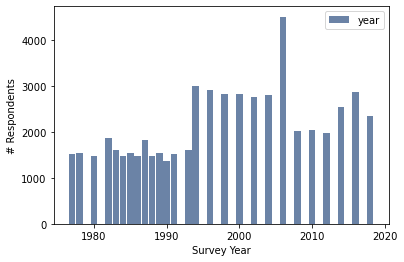

In [31]:
hist1 = thinkstats2.Hist(df.year, label='year')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Survey Year', ylabel='# Respondents')

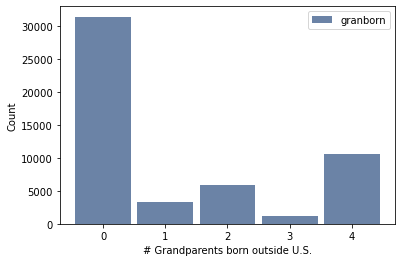

In [32]:
hist2 = thinkstats2.Hist(df.granborn, label='granborn')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='# Grandparents born outside U.S.', ylabel='# Respondents')

In [63]:
len(df[df.granborn == 0]), len(df[df.granborn > 0])

(31367, 20944)

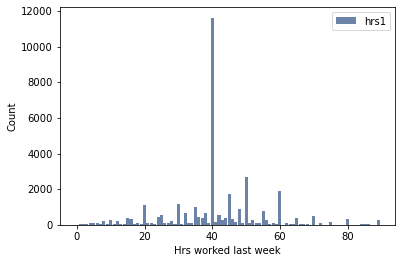

In [33]:
hist3 = thinkstats2.Hist(df.hrs1, label='hrs1')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Hrs worked last week', ylabel='# Respondents')

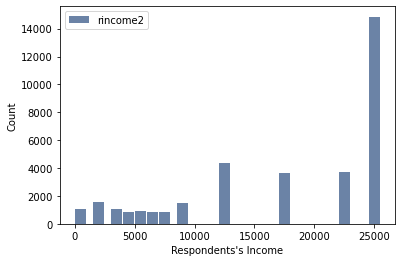

In [34]:
hist4 = thinkstats2.Hist(df.rincome2, label='rincome2')
thinkplot.Hist(hist4)
thinkplot.Config(xlabel="Respondents's Income", ylabel='# Respondents')

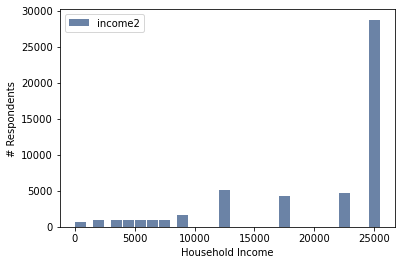

In [66]:
hist4b = thinkstats2.Hist(df.income2, label='income2')
thinkplot.Hist(hist4b)
thinkplot.Config(xlabel="Household Income", ylabel='# Respondents')

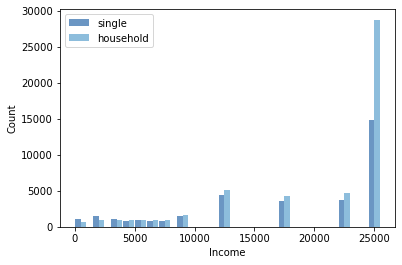

In [70]:
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(hist4, align='right', width=width, label="single")
thinkplot.Hist(hist4b, align='left', width=width, label="household")
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [75]:
df['rincome2'].count(), df['income2'].count()

(35241, 50934)

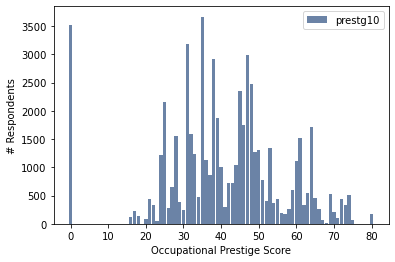

In [35]:
hist5 = thinkstats2.Hist(df.prestg10, label='prestg10')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Occupational Prestige Score', ylabel='# Respondents')

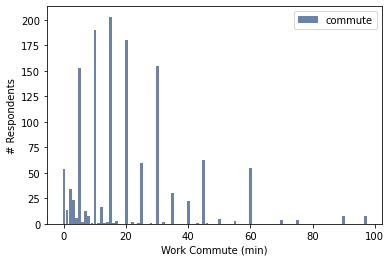

In [36]:
hist6 = thinkstats2.Hist(df.commute, label='commute')
thinkplot.Hist(hist6)
thinkplot.Config(xlabel='Work Commute (min)', ylabel='# Respondents')

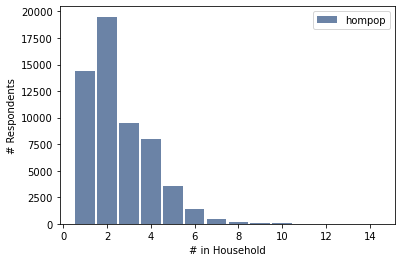

In [64]:
hist7 = thinkstats2.Hist(df.hompop, label='hompop')
thinkplot.Hist(hist7)
thinkplot.Config(xlabel='# in Household', ylabel='# Respondents')

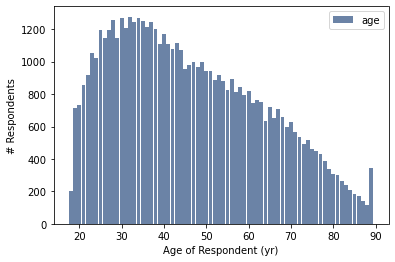

In [65]:
hist8 = thinkstats2.Hist(df.age, label='age')
thinkplot.Hist(hist8)
thinkplot.Config(xlabel='Age of Respondent (yr)', ylabel='# Respondents')

In [37]:
df.commute.median()

15.0

In [38]:
close = df[df.commute <= 15]
far = df[df.commute > 15]

close_hist = thinkstats2.Hist(close.rincome2, label='close')
far_hist = thinkstats2.Hist(far.rincome2, label='far')

In [42]:
# far_hist

Hist({25000.0: 116, 12500.0: 72, 17500.0: 51, 22500.0: 46, 9000.0: 17, 2000.0: 14, 7500.0: 13, 3500.0: 13, 4500.0: 12, 5500.0: 11, 500.0: 11, 6500.0: 6}, 'far')

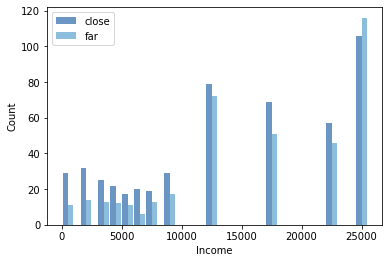

In [50]:
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(close_hist, align='right', width=width)
thinkplot.Hist(far_hist, align='left', width=width)
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [60]:
len(close), len(far)

(721, 609)

#### Mean, Mode, Spread, & Tails
Include the other descriptive characteristics about the variables: Mean, Mode, Spread,  and Tails (Chapter 2). 

In [ ]:
df.year.mean(), df.year.min(), df.year.max()

In [ ]:
# from pandas import DataFrame, read_csv
# import matplotlib.pyplot as plt
# import pandas as pd 

# file = r'data/Presidents.xls'
# df = pd.read_excel(file)

# show data
print('Min: ', df['Years in office'].min())
print('Max: ', df['Years in office'].max())
print('Sum: ', df['Years in office'].sum())

#### Compare two scenarios in your data using a PMF
Using pg. 29 of your text as an example, compare two scenarios in your data using a  PMF. 

Reminder, this isn’t comparing two variables against each other – it is the same  variable, but a different scenario. Almost like a filter. 

The example in the book is first  babies compared to all other babies, it is still the same variable, but breaking the data  out based on criteria we are exploring (Chapter 3).

#### Create 1 CDF with one of your variables
Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this  tell you about your variable and how does it address the question you are trying to  answer (Chapter 4). 

#### Plot 1 analytical distribution
Plot 1 analytical distribution and provide your analysis on how it applies to the dataset  you have chosen (Chapter 5). 

#### Create two scatter plots
Create two scatter plots comparing two variables and provide your analysis on  correlation and causation. 

Remember, covariance, Pearson’s correlation, and Non Linear Relationships should also be considered during your analysis (Chapter 7). 

#### Test Hypothesis
Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

#### Conduct Regression Analysis
For this project, conduct a regression analysis on either one dependent and one  explanatory variable, or multiple explanatory variables (Chapter 10 & 11). 